# Web Scraping Snapdeal
## (With EDA and Visualizations)

In [161]:
import requests 
import bs4
from bs4 import BeautifulSoup 
from fake_useragent import UserAgent
import pandas as pd       
import seaborn as sns
import matplotlib.pyplot as plt
import lxml

In [162]:
response = requests.get("https://www.snapdeal.com/products/women-apparel-sarees?sort=plrty")
response = response.text

data = bs4.BeautifulSoup(response, 'lxml')

read = data.select('.product-desc-rating ')

In [163]:
count = 0
nm = []
op = []
dp = []
dpercent = []
rev = []

In [164]:
for i in read:
    prod_name = i.select('.product-title ')
    prod_name = prod_name[0].getText()
    original_price = i.find_all('span', attrs={'class':'lfloat product-desc-price strike'})
    original_price = original_price[0].getText()
    discount_price = i.find_all('span', 'lfloat product-price')
    discount_price = discount_price[0].getText()
    discount_percent = i.find_all('div', 'product-discount')
    discount_percent = discount_percent[0].getText()
    #no_of_reviews = i.find_all('p', 'product-rating-count')
    #no_of_reviews = no_of_reviews[0].getText()
    #print(no_of_reviews)
    nm.append(prod_name)
    op.append(original_price)
    dp.append(discount_price)
    dpercent.append(discount_percent)
    #rev.append(no_of_reviews)
    count = count + 1    
    
print('No. of rows searched',count)

No. of rows searched 20


In [165]:
#df = pd.DataFrame({'Product Name':nm,'Original Price':op,'Discount Price':dp,'Discount Percentage':dpercent,"Review Numbers":rev,})


df = pd.DataFrame({'Product_Name':nm,'Original_Price':op,'Discount_Price':dp,'Discount_Percentage':dpercent,})

## EDA for the Extracted Data

In [166]:
df.head()

,Product_Name,Original_Price,Discount_Price,Discount_Percentage
0,Sherine Multi Color Saree With Blouse Piece,Rs. 899,Rs. 299,\n67% Off\n
1,"Sherine Black,Yellow Polka Print Saree (Fabric...","Rs. 1,799",Rs. 375,\n79% Off\n
2,"Sherine Black,Pink Printed Saree (Fabric- Poly...","Rs. 1,799",Rs. 375,\n79% Off\n
3,"Desh Bidesh Green,Red Bengal cotton Saree","Rs. 2,180",Rs. 884,\n59% Off\n
4,Kiran Sarees Purple Art Silk Saree,"Rs. 4,999","Rs. 1,699",\n66% Off\n


In [167]:
df.shape

(20, 4)

In [168]:
df['Discount_Percentage']

0     \n67% Off\n
1     \n79% Off\n
2     \n79% Off\n
3     \n59% Off\n
4     \n66% Off\n
5     \n76% Off\n
6     \n59% Off\n
7     \n79% Off\n
8     \n73% Off\n
9     \n15% Off\n
10    \n80% Off\n
11    \n78% Off\n
12    \n77% Off\n
13    \n33% Off\n
14    \n68% Off\n
15    \n79% Off\n
16    \n66% Off\n
17    \n79% Off\n
18    \n42% Off\n
19    \n80% Off\n
Name: Discount_Percentage, dtype: object

In [169]:
df['Discount_Percentage'] = df['Discount_Percentage'].str.replace('\n','')

In [170]:
df['Discount_Percentage']

0     67% Off
1     79% Off
2     79% Off
3     59% Off
4     66% Off
5     76% Off
6     59% Off
7     79% Off
8     73% Off
9     15% Off
10    80% Off
11    78% Off
12    77% Off
13    33% Off
14    68% Off
15    79% Off
16    66% Off
17    79% Off
18    42% Off
19    80% Off
Name: Discount_Percentage, dtype: object

In [171]:
df['Discount_Percentage'] = df['Discount_Percentage'].str.replace('% Off','').astype(int)

In [172]:
df['Discount_Percentage']

0     67
1     79
2     79
3     59
4     66
5     76
6     59
7     79
8     73
9     15
10    80
11    78
12    77
13    33
14    68
15    79
16    66
17    79
18    42
19    80
Name: Discount_Percentage, dtype: int32

In [173]:
df['Original_Price'] = df['Original_Price'].str.replace('Rs. ','')

In [174]:
df['Original_Price']

0       899
1     1,799
2     1,799
3     2,180
4     4,999
5     1,376
6     2,180
7     1,634
8     1,330
9       999
10    1,721
11    2,999
12    1,721
13    3,599
14      999
15    1,799
16    2,999
17    1,750
18    2,399
19    2,000
Name: Original_Price, dtype: object

In [175]:
df['Discount_Price'] = df['Discount_Price'].str.replace('Rs. ','')

In [176]:
df['Discount_Price']

0        299
1        375
2        375
3        884
4      1,699
5        324
6        884
7        349
8        357
9        849
10       351
11       655
12       399
13     2,399
14       319
15       375
16     1,015
17       369
18     1,389
19       399
Name: Discount_Price, dtype: object

In [177]:
df['Original_Price'] = df['Original_Price'].str.replace(',','').astype(float)

In [178]:
df['Original_Price']

0      899.0
1     1799.0
2     1799.0
3     2180.0
4     4999.0
5     1376.0
6     2180.0
7     1634.0
8     1330.0
9      999.0
10    1721.0
11    2999.0
12    1721.0
13    3599.0
14     999.0
15    1799.0
16    2999.0
17    1750.0
18    2399.0
19    2000.0
Name: Original_Price, dtype: float64

In [179]:
df['Discount_Price'] = df['Discount_Price'].str.replace(',','').astype(float)

In [180]:
df['Discount_Price']

0      299.0
1      375.0
2      375.0
3      884.0
4     1699.0
5      324.0
6      884.0
7      349.0
8      357.0
9      849.0
10     351.0
11     655.0
12     399.0
13    2399.0
14     319.0
15     375.0
16    1015.0
17     369.0
18    1389.0
19     399.0
Name: Discount_Price, dtype: float64

In [181]:
df.head()

,Product_Name,Original_Price,Discount_Price,Discount_Percentage
0,Sherine Multi Color Saree With Blouse Piece,899.0,299.0,67
1,"Sherine Black,Yellow Polka Print Saree (Fabric...",1799.0,375.0,79
2,"Sherine Black,Pink Printed Saree (Fabric- Poly...",1799.0,375.0,79
3,"Desh Bidesh Green,Red Bengal cotton Saree",2180.0,884.0,59
4,Kiran Sarees Purple Art Silk Saree,4999.0,1699.0,66


In [183]:
df.tail()

,Product_Name,Original_Price,Discount_Price,Discount_Percentage
15,Sherine Black Printed Saree (Fabric- Poly Geor...,1799.0,375.0,79
16,Darshita International Blue and Beige Georgett...,2999.0,1015.0,66
17,Sherine Beige Saree with Blouse Piece,1750.0,369.0,79
18,SRP Fashion Selection Blue Jacquard Saree,2399.0,1389.0,42
19,Gazal Fashions Blue Cotton Saree,2000.0,399.0,80


In [184]:
df.describe()

,Original_Price,Discount_Price,Discount_Percentage
count,20.000000,20.000000,20.000000
mean,2059.050000,703.250000,66.700000
std,979.497372,560.446333,17.785565
min,899.000000,299.000000,15.000000
25%,1569.500000,355.500000,64.250000
50%,1799.000000,387.000000,74.500000
75%,2234.750000,884.000000,79.000000
max,4999.000000,2399.000000,80.000000


In [185]:
df.info()

#No Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Name         20 non-null     object 
 1   Original_Price       20 non-null     float64
 2   Discount_Price       20 non-null     float64
 3   Discount_Percentage  20 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 688.0+ bytes


In [186]:
df.shape

(20, 4)

In [187]:
df.dtypes

Product_Name            object
Original_Price         float64
Discount_Price         float64
Discount_Percentage      int32
dtype: object

In [188]:
df.isnull().sum()

Product_Name           0
Original_Price         0
Discount_Price         0
Discount_Percentage    0
dtype: int64

In [201]:
WS_df["Original_Price"].unique()

array([ 899., 1799., 2180., 4999., 1376., 1634., 1330.,  999., 1721.,
       2999., 3599., 1750., 2399., 2000.])

In [202]:
WS_df["Discount_Price"].unique()

array([ 299.,  375.,  884., 1699.,  324.,  349.,  357.,  849.,  351.,
        655.,  399., 2399.,  319., 1015.,  369., 1389.])

In [203]:
WS_df["Discount_Percentage"].unique()

array([67, 79, 59, 66, 76, 73, 15, 80, 78, 77, 33, 68, 42], dtype=int64)

In [204]:
WS_df["Discount_Percentage"].value_counts()

79    5
59    2
80    2
66    2
78    1
77    1
76    1
42    1
73    1
15    1
68    1
67    1
33    1
Name: Discount_Percentage, dtype: int64

In [205]:
pd.crosstab(WS_df['Discount_Price'], WS_df["Discount_Percentage"], margins=True)

Discount_Percentage,15,33,42,59,66,67,68,73,76,77,78,79,80,All
Discount_Price,,,,,,,,,,,,,,
299.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
319.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
324.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
349.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
351.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
357.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
369.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
375.0,0,0,0,0,0,0,0,0,0,0,0,3,0,3
399.0,0,0,0,0,0,0,0,0,0,1,0,0,1,2


In [231]:
#Making the copy of data to showcase how to drop outlier values

WS_df_Copy = WS_df.copy()
WS_df_Copy.head()

,Product_Name,Original_Price,Discount_Price,Discount_Percentage
0,Sherine Multi Color Saree With Blouse Piece,899.0,299.0,67
1,"Sherine Black,Yellow Polka Print Saree (Fabric...",1799.0,375.0,79
2,"Sherine Black,Pink Printed Saree (Fabric- Poly...",1799.0,375.0,79
3,"Desh Bidesh Green,Red Bengal cotton Saree",2180.0,884.0,59
4,Kiran Sarees Purple Art Silk Saree,3232.0,1699.0,66


In [232]:
Q1 = WS_df_Copy.quantile(0.25)           #  Lower quartile
Q3 = WS_df_Copy.quantile(0.75)           # Upper quartile
IQR = Q3 - Q1                            #Inter-Quartile Range
IQR

Original_Price         665.25
Discount_Price         528.50
Discount_Percentage     14.75
dtype: float64

In [233]:
WS_df_Copy.shape

(20, 4)

In [234]:
#Removing outliers in the dataset & Retaining values in dataframe which are not outliers

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
WS_df_Copy = WS_df_Copy[~((WS_df_Copy < min) | (WS_df_Copy > max)).any(axis = 1)]
WS_df_Copy.shape

(16, 4)

In [235]:
# Treating outliers in Original Price

Q3 = WS_df['Original_Price'].quantile(0.75)
Q1 = WS_df['Original_Price'].quantile(0.25)
IQR = Q3 - Q1
print(IQR)

665.25


In [236]:
lower_bridge = Q1 - (IQR * 1.5)        #threshold
upper_bridge = Q3 + (IQR * 1.5)        #threshold
print(lower_bridge)
print(upper_bridge)

571.625
3232.625


In [237]:
# Push the outliers to the threshold value
# wherever Total day calls is greater than 154, set Total day calls to 154 and age is less than 46, set to 46

WS_df.loc[WS_df['Original_Price'] > 3232, 'Original_Price'] = 3232
WS_df.loc[WS_df['Original_Price'] < 571, 'Original_Price'] = 571
print(WS_df['Original_Price'].min(), WS_df['Original_Price'].max())

899.0 3232.0


In [238]:
WS_df.groupby('Discount_Price')['Discount_Percentage'].count()

Discount_Price
299.0     1
319.0     1
324.0     1
349.0     1
351.0     1
357.0     1
369.0     1
375.0     3
399.0     2
655.0     1
849.0     1
884.0     2
1015.0    1
1389.0    1
1699.0    1
2399.0    1
Name: Discount_Percentage, dtype: int64

## Saving the Extracted & Cleaned Data to a CSV File

In [189]:
df.to_csv(r'C:\Users\91730\Desktop\DFZ_Assignment\CapstoneProject_1\SnapdealWebscraping.csv', index=False, encoding='utf-8') 

## Visualization for the Extracted Data

In [190]:
WS_df = pd.read_csv(r"C:\Users\91730\Desktop\DFZ_Assignment\CapstoneProject_1\SnapdealWebscraping.csv")
WS_df.head()

,Product_Name,Original_Price,Discount_Price,Discount_Percentage
0,Sherine Multi Color Saree With Blouse Piece,899.0,299.0,67
1,"Sherine Black,Yellow Polka Print Saree (Fabric...",1799.0,375.0,79
2,"Sherine Black,Pink Printed Saree (Fabric- Poly...",1799.0,375.0,79
3,"Desh Bidesh Green,Red Bengal cotton Saree",2180.0,884.0,59
4,Kiran Sarees Purple Art Silk Saree,4999.0,1699.0,66


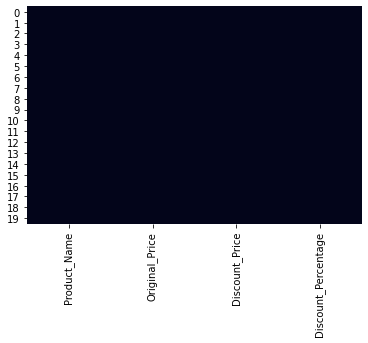

In [210]:
#visualization helps to find the distribution of null values in the data

sns.heatmap(WS_df.isnull(), cbar = False)
plt.show()

#No Null Values

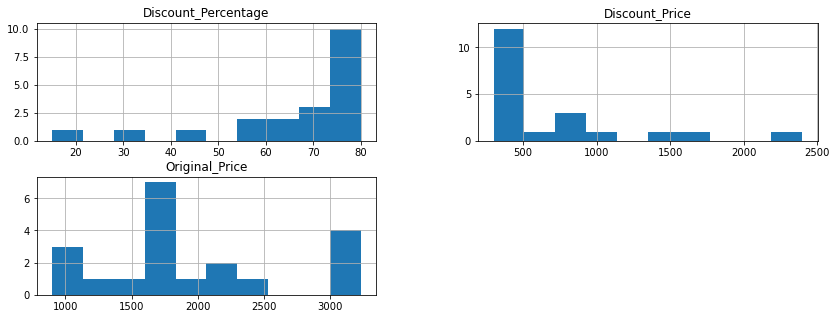

In [242]:
# Plot Histograms of Original Price, Discount Price and Discount Percentage

WS_df.hist(figsize=(14,5))
plt.show()

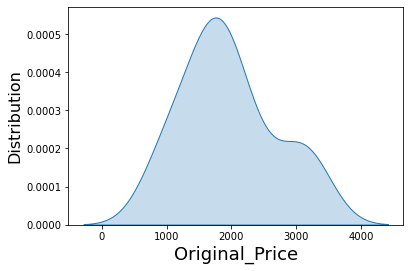

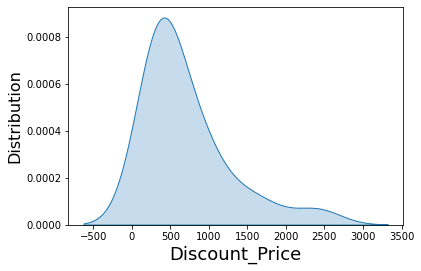

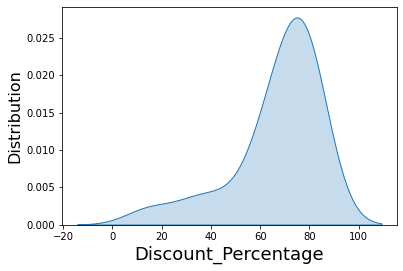

In [244]:
# Plot Distibution Plots of Original Price, Discount Price and Discount Percentage

columns = ['Original_Price','Discount_Price', 'Discount_Percentage']
for i in columns:
    sns.kdeplot(WS_df[i],shade = True)
    plt.xlabel(i, fontsize = 18)
    plt.ylabel('Distribution', fontsize =16)
    plt.show()

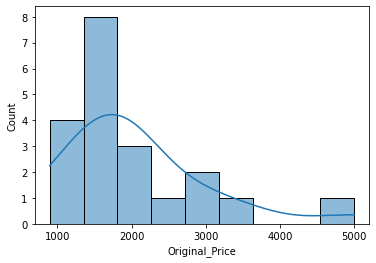

In [211]:
sns.histplot(WS_df["Original_Price"], kde = True)
plt.show()

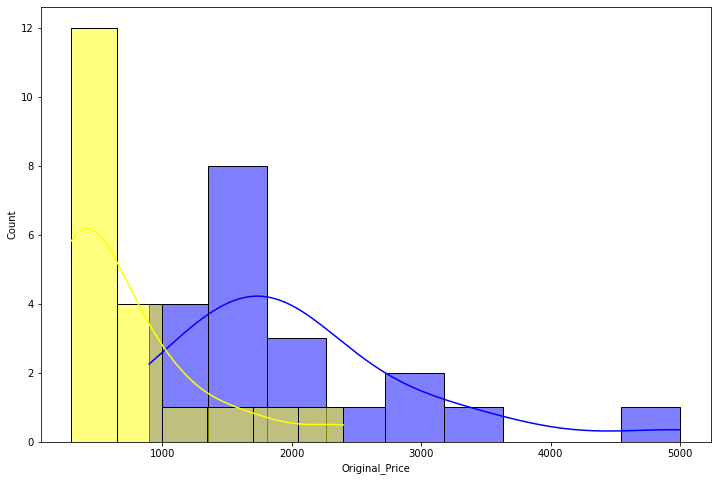

In [212]:
plt.figure(figsize = (12,8))
sns.histplot(WS_df["Original_Price"], kde = True, color = 'blue')
sns.histplot(WS_df["Discount_Price"], kde = True, color = 'yellow')
plt.show()

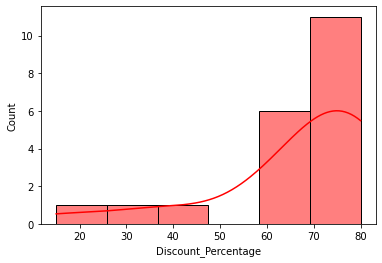

In [213]:
sns.histplot(WS_df["Discount_Percentage"], kde = True, color = 'red')
plt.show()

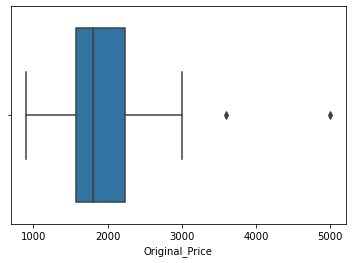

In [214]:
#outliers in Original Price

sns.boxplot(x = 'Original_Price', data = WS_df)
plt.show()

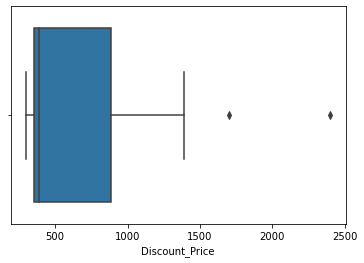

In [215]:
#outliers in Discount Price

sns.boxplot(x = 'Discount_Price', data = WS_df)
plt.show()

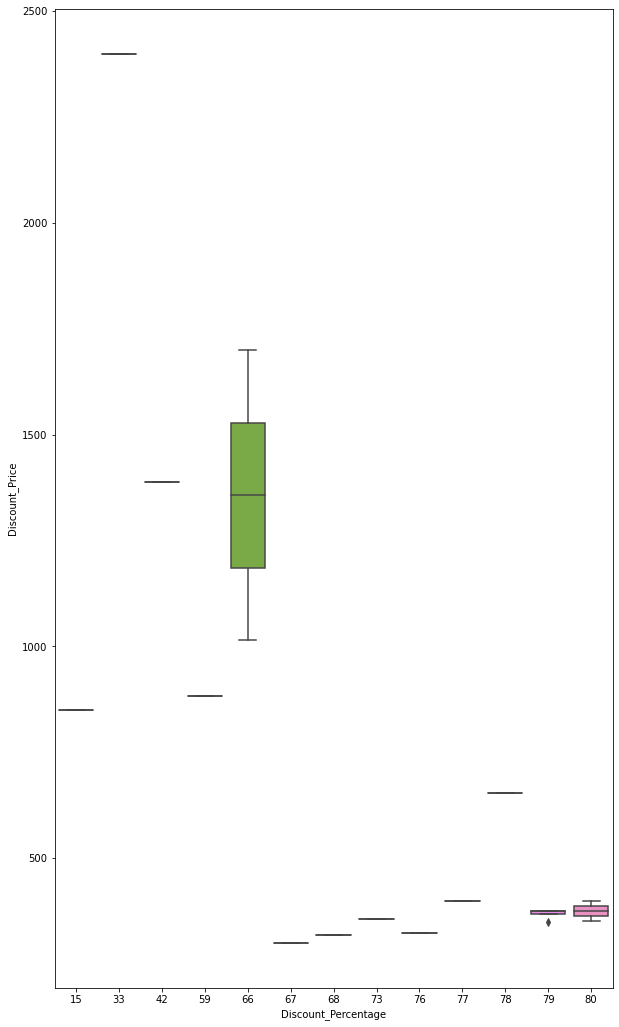

In [251]:
# Bivariate Analysis
# Box plot of Discount Price and Discount Percentage

plt.figure(figsize = (10, 18))
sns.boxplot(y = "Discount_Price", x = 'Discount_Percentage', data = WS_df)
plt.show()

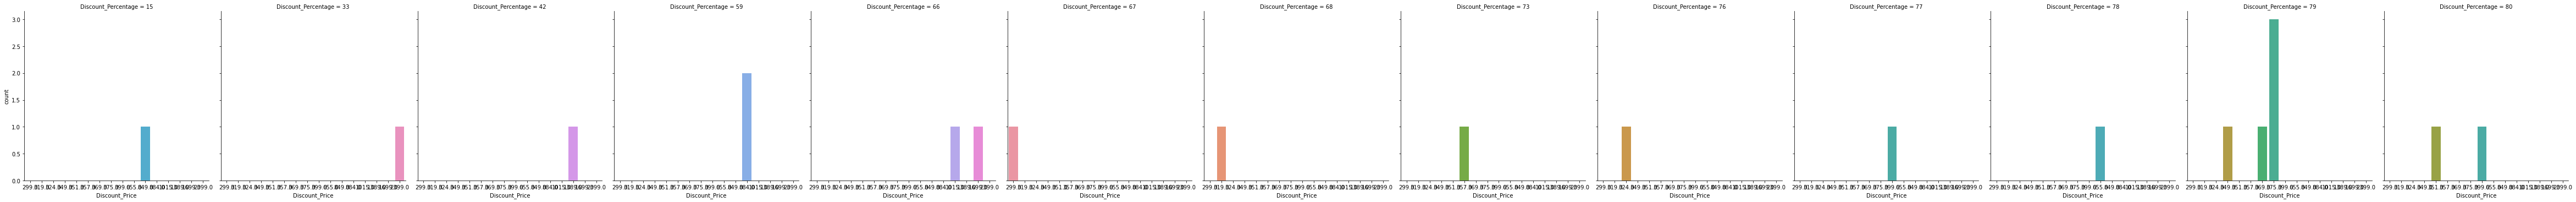

In [216]:
sns.catplot(x = 'Discount_Price', col = 'Discount_Percentage', kind = 'count', data = WS_df) 
plt.show()

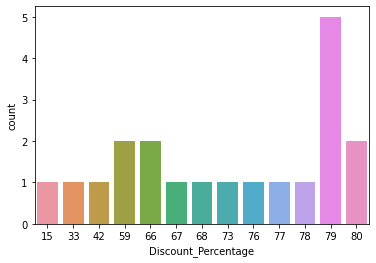

In [239]:
sns.countplot(x = 'Discount_Percentage', data = WS_df);
plt.show()

In [240]:
# Correlation Plot 

cor = WS_df.corr()
cor.style.background_gradient().set_precision(1)

,Original_Price,Discount_Price,Discount_Percentage
Original_Price,1.0,0.7,-0.1
Discount_Price,0.7,1.0,-0.7
Discount_Percentage,-0.1,-0.7,1.0


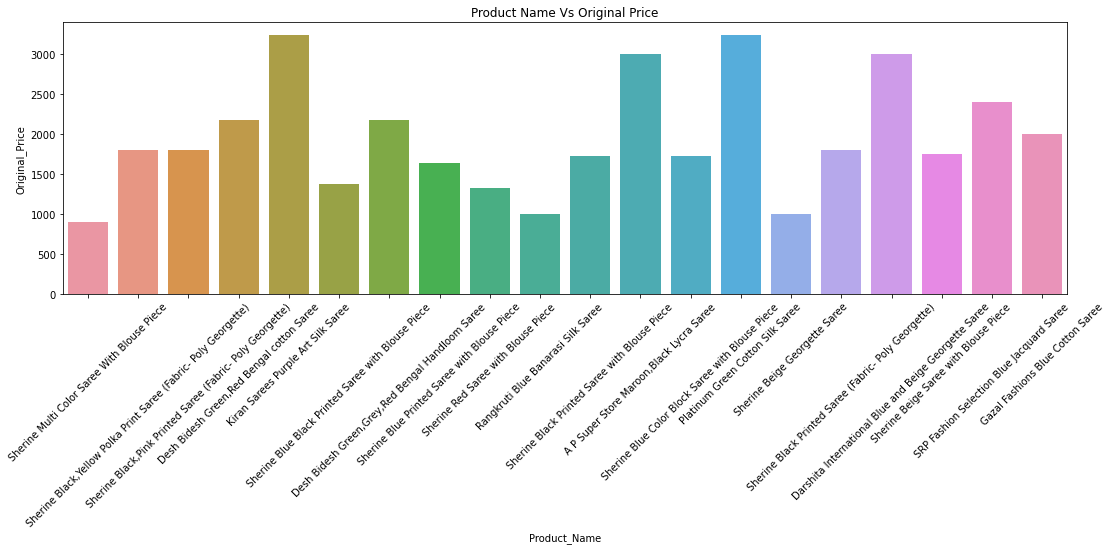

In [269]:
# Bar Plot - Product Name Vs Original Price

plt.figure(figsize = (18,5))
sns.barplot(x = WS_df['Product_Name'], y = WS_df['Original_Price'])
plt.xticks(rotation = 45)
plt.title("Product Name Vs Original Price")
plt.show()

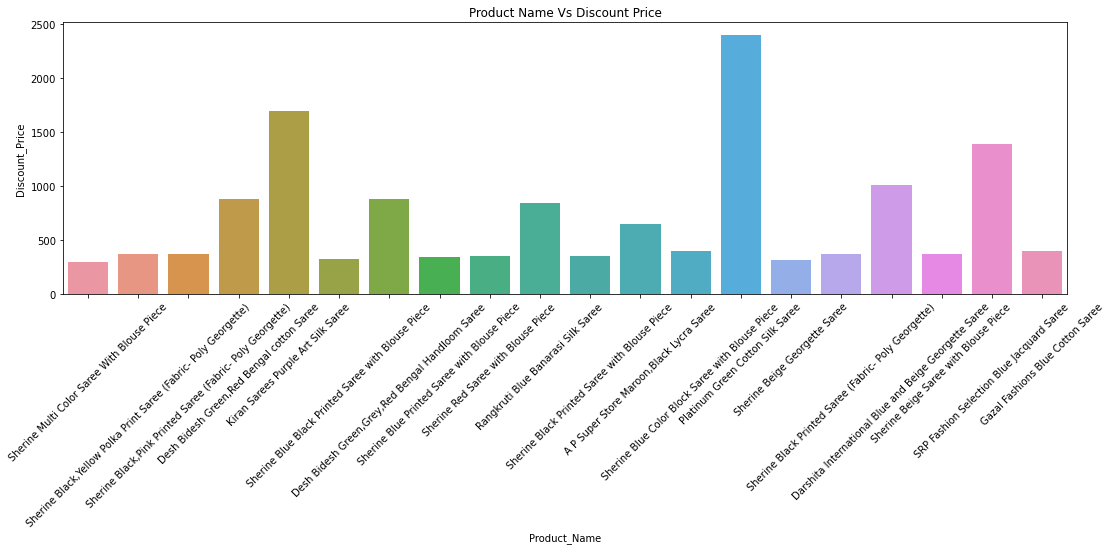

In [268]:
# Bar Plot - Product Name Vs Dicount Price

plt.figure(figsize = (18,5))
sns.barplot(x = WS_df['Product_Name'], y = WS_df['Discount_Price'])
plt.xticks(rotation = 45)
plt.title("Product Name Vs Discount Price")
plt.show()

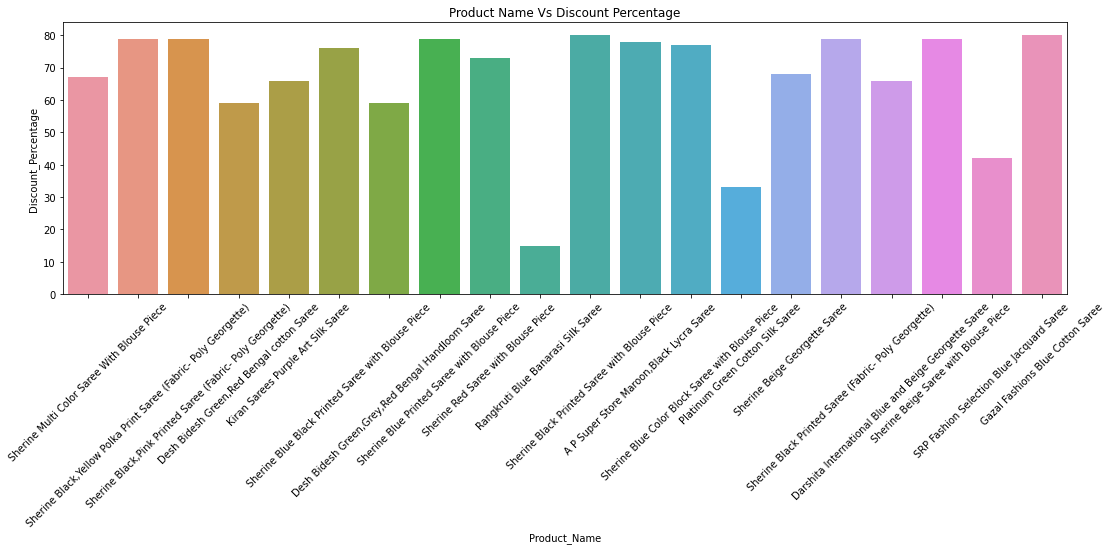

In [267]:
# Bar Plot - Product Name Vs Dicount Percentage

plt.figure(figsize = (18,5))
sns.barplot(x = WS_df['Product_Name'], y = WS_df['Discount_Percentage'])
plt.xticks(rotation = 45)
plt.title("Product Name Vs Discount Percentage")
plt.show()

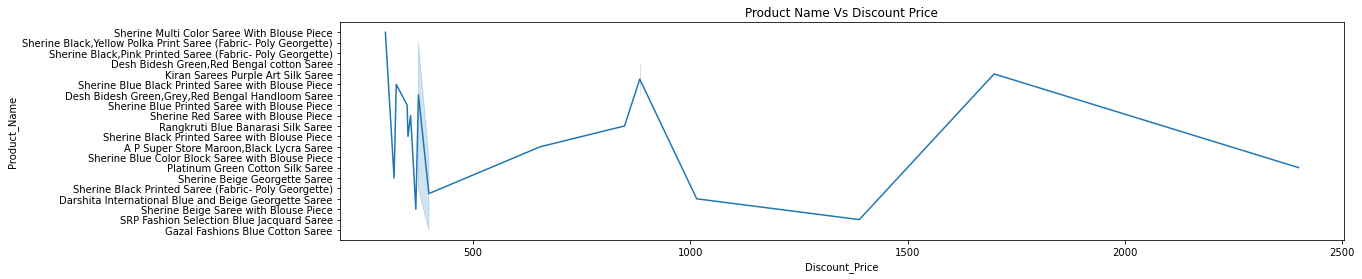

In [266]:
# Line Plot - Product Name Vs Discount Price

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Discount_Price'], y = WS_df['Product_Name'])
plt.title("Product Name Vs Discount Price")
plt.show()

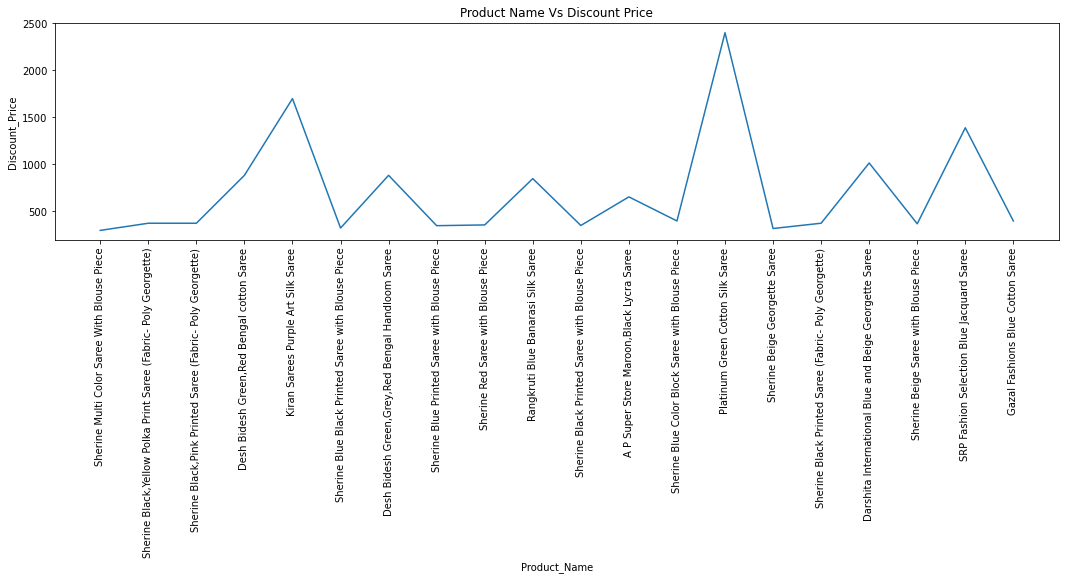

In [265]:
# Line Plot - Product Name Vs Discount Price

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Product_Name'], y = WS_df['Discount_Price'])
plt.xticks(rotation = 90)
plt.title("Product Name Vs Discount Price")
plt.show()

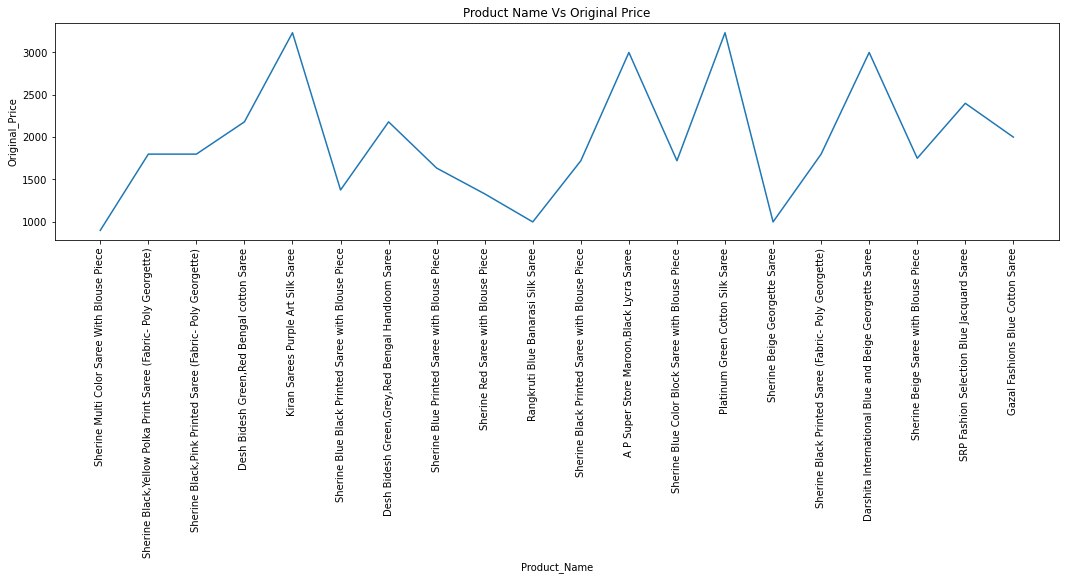

In [264]:
# Line Plot - Product Name Vs Original Price

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Product_Name'], y = WS_df['Original_Price'])
plt.xticks(rotation = 90)
plt.title("Product Name Vs Original Price")
plt.show()

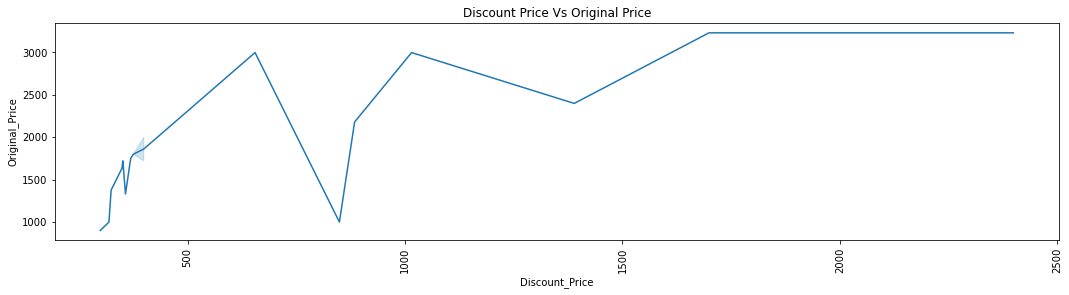

In [270]:
# Line Plot - Discount Price Vs Original Price

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Discount_Price'], y = WS_df['Original_Price'])
plt.xticks(rotation = 90)
plt.title("Discount Price Vs Original Price")
plt.show()

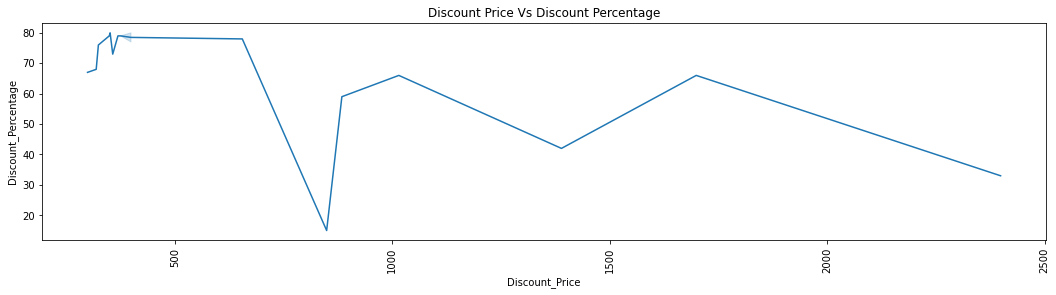

In [271]:
# Line Plot - Discount Price Vs Discount_Percentage

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Discount_Price'], y = WS_df['Discount_Percentage'])
plt.xticks(rotation = 90)
plt.title("Discount Price Vs Discount Percentage")
plt.show()

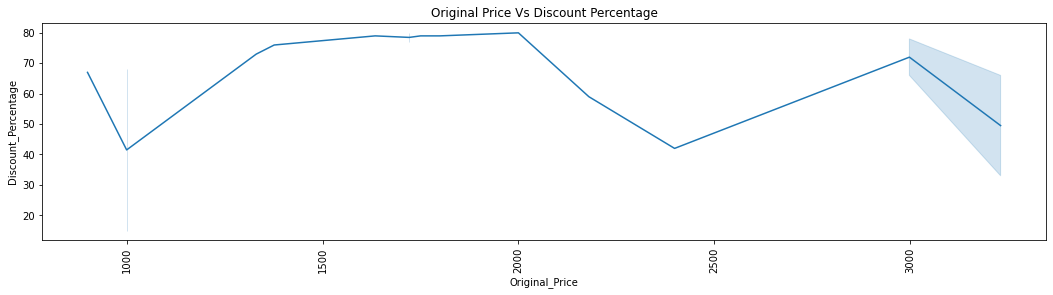

In [272]:
# Line Plot - Original Price Vs Discount_Percentage

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Original_Price'], y = WS_df['Discount_Percentage'])
plt.xticks(rotation = 90)
plt.title("Original Price Vs Discount Percentage")
plt.show()

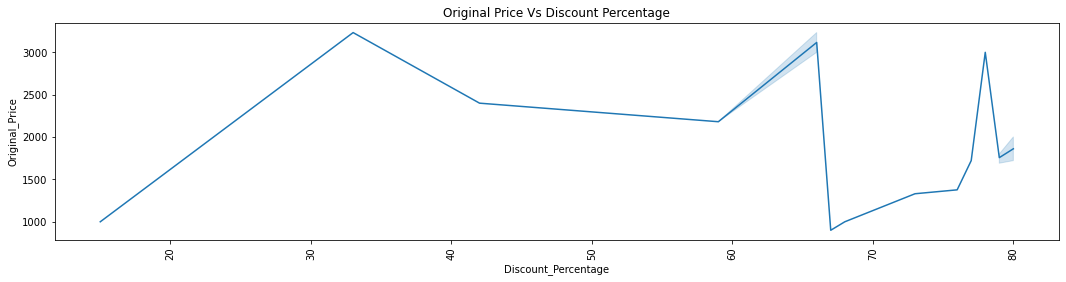

In [273]:
# Line Plot - Original Price Vs Discount_Percentage

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Discount_Percentage'], y = WS_df['Original_Price'])
plt.xticks(rotation = 90)
plt.title("Original Price Vs Discount Percentage")
plt.show()

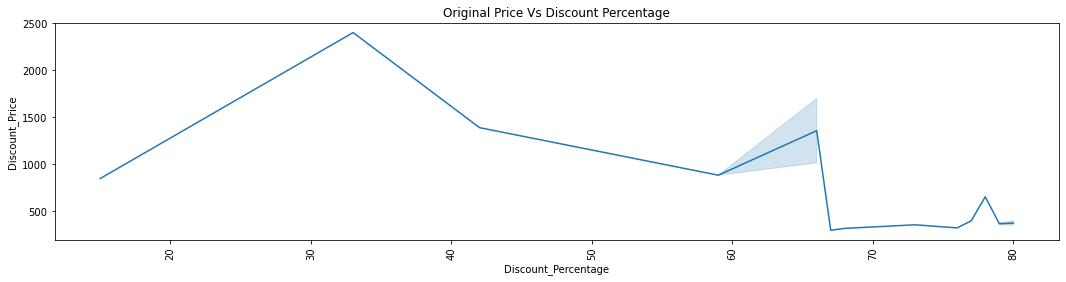

In [274]:
# Line Plot - Discount Price Vs Discount_Percentage

plt.figure(figsize = (18,4))
sns.lineplot(x = WS_df['Discount_Percentage'], y = WS_df['Discount_Price'])
plt.xticks(rotation = 90)
plt.title("Discount Price Vs Discount Percentage")
plt.show()

In [275]:
WS_df.describe()

,Original_Price,Discount_Price,Discount_Percentage
count,20.000000,20.000000,20.000000
mean,1952.350000,703.250000,66.700000
std,715.911658,560.446333,17.785565
min,899.000000,299.000000,15.000000
25%,1569.500000,355.500000,64.250000
50%,1799.000000,387.000000,74.500000
75%,2234.750000,884.000000,79.000000
max,3232.000000,2399.000000,80.000000


### Inference:
* Discount price is about half of te original price
* Average original price is around Rs. 2000
* But average discount price is around Rs. 700
* More dicounts were given for products that have an average original price greater than Rs. 2000